In [5]:
import pandas as pd
from dotenv import load_dotenv
import pickle
load_dotenv()
DATA_PATH = "../data/" 
# Adjust this to your relative path to the datasets

In [2]:
corpus_df = pd.read_csv(DATA_PATH + "process_behavior_corpus.csv")

In [ ]:

T_SAD_df = pd.read_csv(DATA_PATH + "T_SAD.csv")
A_SAD_df = pd.read_csv(DATA_PATH + "A_SAD.csv")
S_NAP_df = pd.read_csv(DATA_PATH + "S_NAP.csv")
S_PMD_df = pd.read_csv(DATA_PATH + "S-PMD.csv")

In [17]:
# open extracted_labels.pkl
import pickle
with open(DATA_PATH + 'extracted_labels.pkl', 'rb') as f:
    extracted_labels = pickle.load(f)
    print(extracted_labels)

[PairsFromLabel(original_label='carry out simple risk assessment', object_action_pairs=[ObjectActionPair(object='simple risk assessment', action='carry out')]), PairsFromLabel(original_label='select flight', object_action_pairs=[ObjectActionPair(object='flight', action='select')]), PairsFromLabel(original_label='Seals prescription and place in pick-up', object_action_pairs=[ObjectActionPair(object='prescription', action='seal'), ObjectActionPair(object='pick-up', action='place')]), PairsFromLabel(original_label='put together report for recommendation', object_action_pairs=[ObjectActionPair(object='report', action='put together')]), PairsFromLabel(original_label='Customer receive delivery', object_action_pairs=[ObjectActionPair(object='delivery', action='receive')]), PairsFromLabel(original_label='Voice and text recognition', object_action_pairs=[ObjectActionPair(object='voice and text', action='recognize')]), PairsFromLabel(original_label='Post Settlement Checks', object_action_pairs=[

In [9]:
len(corpus_df)

15902

In [ ]:
corpus_df["num_unique"] = corpus_df["unique_activities"].apply(lambda x: len(eval(x)))
corpus_df["num_variants"] = corpus_df["string_traces"].apply(lambda x: len(eval(x)))
print("Mean activities", corpus_df["num_unique"].mean())
print("Median activities", corpus_df["num_unique"].median())
print("Mean traces", corpus_df["num_variants"].mean())
print("Max traces", corpus_df["num_variants"].max())

In [9]:
T_SAD_df["trace_length"] = T_SAD_df["trace"].apply(lambda x: len(x.split(",")))
print(T_SAD_df["trace_length"].min(),
      T_SAD_df["trace_length"].max(),
        T_SAD_df["trace_length"].mean(),
        T_SAD_df["trace_length"].median())

2 17 6.333385979790627 7.0


In [ ]:
A_SAD_df

In [ ]:
S_NAP_df

In [6]:
# compute min, mean, median, and max prefix lenghths
S_NAP_df["prefix_length"] = S_NAP_df["prefix"].apply(lambda x: len(eval(x)))
print(S_NAP_df["prefix_length"].min(),
      S_NAP_df["prefix_length"].mean(),
      S_NAP_df["prefix_length"].median(),
      S_NAP_df["prefix_length"].max())

S_NAP_df


1 4.704929325620345 5.0 10


,model_id,revision_id,trace,prefix,next,unique_activities,id,prefix_length
0,e8990a10f516495e89a1eabf9627b9e9,295ab34872b6424aad0b4633abb621a9,"['Add personal data', 'Select necessary work e...",['Add personal data'],Select necessary work equipment,"{'Set up access rights, hardware and software'...",e8990a10f516495e89a1eabf9627b9e9_295ab34872b64...,1
1,e8990a10f516495e89a1eabf9627b9e9,295ab34872b6424aad0b4633abb621a9,"['Add personal data', 'Select necessary work e...","['Add personal data', 'Select necessary work e...",Procure work equipment,"{'Set up access rights, hardware and software'...",e8990a10f516495e89a1eabf9627b9e9_295ab34872b64...,2
2,e8990a10f516495e89a1eabf9627b9e9,295ab34872b6424aad0b4633abb621a9,"['Add personal data', 'Select necessary work e...","['Add personal data', 'Select necessary work e...","Set up access rights, hardware and software","{'Set up access rights, hardware and software'...",e8990a10f516495e89a1eabf9627b9e9_295ab34872b64...,3
3,e8990a10f516495e89a1eabf9627b9e9,295ab34872b6424aad0b4633abb621a9,"['Add personal data', 'Select necessary work e...","['Add personal data', 'Select necessary work e...",[END],"{'Set up access rights, hardware and software'...",e8990a10f516495e89a1eabf9627b9e9_295ab34872b64...,4
4,e8990a10f516495e89a1eabf9627b9e9,295ab34872b6424aad0b4633abb621a9,"['Add personal data', 'Select necessary work e...",['Add personal data'],Select necessary work equipment,"{'Set up access rights, hardware and software'...",e8990a10f516495e89a1eabf9627b9e9_295ab34872b64...,1
...,...,...,...,...,...,...,...,...
1289076,1e07277a2ff0486cba1cd100be7b4a59,92f009351a754acba9ae871f4a1f22c6,"['Security Check', 'Passenger fails Security C...","['Security Check', 'Passenger fails Security C...",[END],"{'Passenger fails Security Check', 'Security C...",1e07277a2ff0486cba1cd100be7b4a59_92f009351a754...,2
1289077,1e0d27c5c47f486f8b90cd517bf9449d,ae7a74f9ae4a4b5fad9399b3dc19a97b,"['Create purchase request', 'Place purchase or...",['Create purchase request'],Place purchase order,"{'Receive goods', 'Receive payment', 'Place pu...",1e0d27c5c47f486f8b90cd517bf9449d_ae7a74f9ae4a4...,1
1289078,1e0d27c5c47f486f8b90cd517bf9449d,ae7a74f9ae4a4b5fad9399b3dc19a97b,"['Create purchase request', 'Place purchase or...","['Create purchase request', 'Place purchase or...",Receive goods,"{'Receive goods', 'Receive payment', 'Place pu...",1e0d27c5c47f486f8b90cd517bf9449d_ae7a74f9ae4a4...,2
1289079,1e0d27c5c47f486f8b90cd517bf9449d,ae7a74f9ae4a4b5fad9399b3dc19a97b,"['Create purchase request', 'Place purchase or...","['Create purchase request', 'Place purchase or...",Receive payment,"{'Receive goods', 'Receive payment', 'Place pu...",1e0d27c5c47f486f8b90cd517bf9449d_ae7a74f9ae4a4...,3


In [13]:
# compute the min, average, median, max size of dfg
print(S_PMD_df["dfg"].apply(lambda x: len(eval(x))).min(), 
      S_PMD_df["dfg"].apply(lambda x: len(eval(x))).mean(),
       S_PMD_df["dfg"].apply(lambda x: len(eval(x))).median(),
        S_PMD_df["dfg"].apply(lambda x: len(eval(x))).max())

1 5.1899873257287705 4.0 87


In [ ]:
S_PMD_df["num_unique_activities"] = S_PMD_df["unique_activities"].apply(len)
S_PMD_df = S_PMD_df[S_PMD_df["num_unique_activities"] > 1]
with open(
     "../eval/train_val_test.pkl", "rb"
) as file:
    train_ids, val_ids, test_ids = pickle.load(file)
train_df = S_PMD_df[S_PMD_df["id"].isin(train_ids)]
val_df = S_PMD_df[S_PMD_df["id"].isin(val_ids)]
test_df = S_PMD_df[S_PMD_df["id"].isin(test_ids)]

print(len(S_PMD_df), len(train_df), len(val_df), len(test_df))

15780 11340 2755 1528


In [6]:
with open(
     "./eval/train_val_test.pkl", "rb"
) as file:
    train_ids, val_ids, test_ids = pickle.load(file)
train_df = corpus_df[corpus_df["id"].isin(train_ids)]
val_df = corpus_df[corpus_df["id"].isin(val_ids)]
test_df = corpus_df[corpus_df["id"].isin(test_ids)]

print(len(corpus_df), len(train_df), len(val_df), len(test_df))

15902 11424 2775 1542


In [9]:
print(len(corpus_df), len(corpus_df["model_id"].unique()))

15902 15902


### Domain Classification

In [24]:
APQC_LEVEL_1 = [
    "Develop and Manage Products and Services",
    "Develop and Manage Human Capital",
    "Develop Vision and Strategy",
    "Market and Sell Products and Services",
    "Deliver Physical Products",
    "Deliver Services",
    "Manage Customer Service",
    "Manage Information Technology",
    "Managee Financial Resources",
    "Acquire, Construct, and Manage Assets",
    "Manage Enterprise Risk, Compliance, Remediation, and Resiliency",
    "Manage External Relationships",
    "Develop and Manage Business Capabilities"
]

SAP_INDUSTRIES = [
    "Aerospace and defense",
    "Agribusiness",
    "Automotive",
    "Banking",
    "Chemicals",
    "Consumer products",
    "Construction and real estate",
    "Defense and security",
    "Government",
    "High tech",
    "Higher education and research",
    "Industrial manufacturing",
    "Insurance",
    "Life sciences and healthcare",
    "Media, sports, and entertainment",
    "Mill products",
    "Mining",
    "Oil, gas, and energy",
    "Professional services",
    "Retail",
    "Telecommunications",
    "Travel and transportation",
    "Utilities",
    "Logistics/Wholesale distribution",
]
# https://www.sap.com/industries.html

In [55]:
apqc_categorization = pd.read_csv(DATA_PATH + "categorized_processes.csv")
apqc_categorization["category"] = apqc_categorization["category"].replace("Other", "Not categorized")
apqc_categorization

,model_id,model_name,unique_activities,category
0,e8990a10f516495e89a1eabf9627b9e9,Employee Onboarding,"['Procure work equipment', 'Add personal data'...",Develop and Manage Human Capital
1,e89a9255406a491cab3bd827a043dd28,Checkout Tianen Jane Doe,"['Scan items and Identify Payment method', 'Ba...",Manage Customer Service
2,e89e0c0e06c440e2a006c32d1d25e3f7,Pay,"['Fill in bank transfer Info', 'Fill in Paypal...",Manage Financial Resources
3,e8a0fe270519408f9df49651977afc8e,Exercise 2,"['statements received', 'Statement from the wi...",Not categorized
4,e8a31cb70a6546b187326a111db648fe,Handle PDF,"['Sign document', 'Send documents by post', 'D...",Not categorized
...,...,...,...,...
15897,1df4da306db045a096218b856ab871f5,verification final,"['mark application as ready', 'Perform academi...",Not categorized
15898,1e05a6468dc54035a1bc56cf17c754a0,Ex 1.2 - week 5,"['Build travel plan', 'Calculate hotel cost', ...",Not categorized
15899,1e05dda50a7a486dae44a03c47bc5ca4,Example 11,"['Risk assessment', 'Simple risk assessment', ...","Manage Enterprise Risk, Compliance, Remediatio..."
15900,1e07277a2ff0486cba1cd100be7b4a59,XOR Gateway,"['Passenger fails Security Check', 'Passenger ...",Not categorized


In [47]:
# load categorized models from the data repository

sap_categorization = pd.read_csv(DATA_PATH + "categorized_processes_by_industry.csv")
sap_categorization["category"] = sap_categorization["category"].replace("Other", "Not categorized")

sap_categorization

,model_id,model_name,unique_activities,category
0,e8990a10f516495e89a1eabf9627b9e9,Employee Onboarding,"['Select necessary work equipment', 'Procure w...",Not categorized
1,e89a9255406a491cab3bd827a043dd28,Checkout Tianen Jane Doe,"['Process credit card', 'Bag items', 'Scan ite...",Retail
2,e89e0c0e06c440e2a006c32d1d25e3f7,Pay,"['Fill in bank transfer Info', 'Receive Receip...",Banking
3,e8a0fe270519408f9df49651977afc8e,Exercise 2,"['statements received', 'Statement from the wi...",Not categorized
4,e8a31cb70a6546b187326a111db648fe,Handle PDF,"['Download document', 'Send documents by post'...",Not categorized
...,...,...,...,...
15897,1df4da306db045a096218b856ab871f5,verification final,"['mark application as ready', 'Perform academi...",Higher education and research
15898,1e05a6468dc54035a1bc56cf17c754a0,Ex 1.2 - week 5,"['Build travel plan', 'Calculate car rental co...",Travel and transportation
15899,1e05dda50a7a486dae44a03c47bc5ca4,Example 11,"['Simple risk assessment', 'Risk assessment', ...",Not categorized
15900,1e07277a2ff0486cba1cd100be7b4a59,XOR Gateway,"['Passenger fails Security Check', 'Passenger ...",Travel and transportation


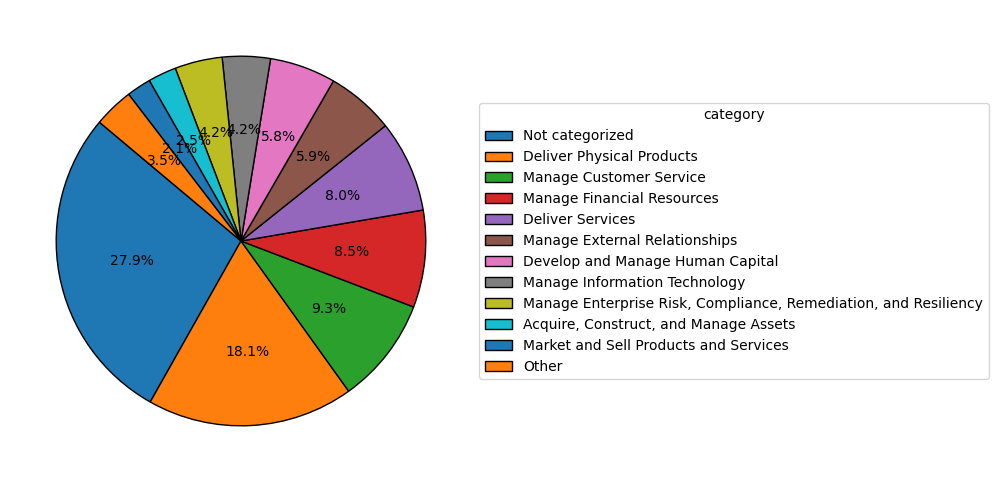

In [50]:
import pandas as pd
import matplotlib.pyplot as plt



def plot_pie_chart(df, column):
    # Count occurrences of each unique value
    counts = df[column].value_counts()
    total = counts.sum()
    
    # Determine which values should be grouped into 'Other'
    mask = (counts / total) < 0.02
    
    # Create a new series with grouped values
    grouped_counts = counts[~mask].copy()
    if mask.any():
        grouped_counts['Other'] = counts[mask].sum()
    
    # Plot pie chart
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        grouped_counts,
        labels=["" for _ in grouped_counts],  # Hide labels on slices
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    
    # Create legend
    ax.legend(wedges, grouped_counts.index, title=column, loc="center left", bbox_to_anchor=(1, 0.5))
    
    plt.show()


plot_pie_chart(apqc_categorization, 'category')

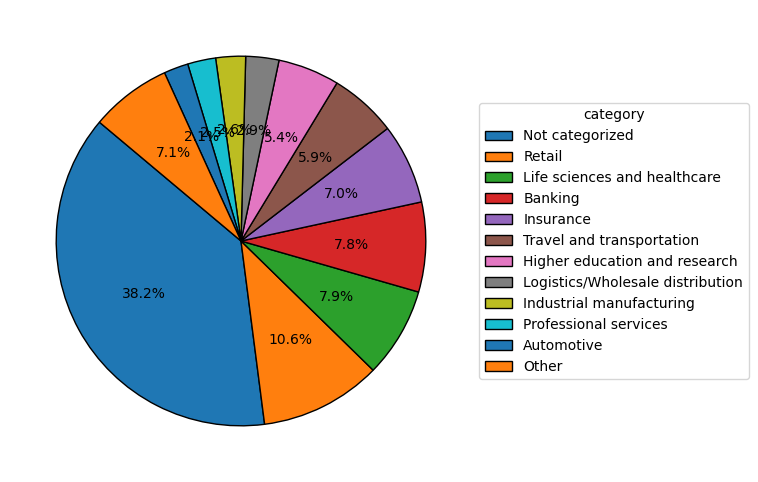

In [51]:
plot_pie_chart(sap_categorization, 'category')

In [ ]:
# Perform an inner join on 'id'
merged_df = pd.merge(apqc_categorization, sap_categorization, on='model_id', how='inner')

len(merged_df[(merged_df["category_x"]=="Not categorized") & (merged_df["category_y"]=="Not categorized")])/len(merged_df)


0.140313345498018

In [57]:
merged_df[(merged_df["category_x"]=="Not categorized") & (merged_df["category_y"]=="Not categorized")]

,model_id,model_name_x,unique_activities_x,category_x,model_name_y,unique_activities_y,category_y
3,e8a0fe270519408f9df49651977afc8e,Exercise 2,"['statements received', 'Statement from the wi...",Not categorized,Exercise 2,"['statements received', 'Statement from the wi...",Not categorized
4,e8a31cb70a6546b187326a111db648fe,Handle PDF,"['Sign document', 'Send documents by post', 'D...",Not categorized,Handle PDF,"['Download document', 'Send documents by post'...",Not categorized
7,e8a997b7747d40e0b2c7e0c3716f25f8,W1-P2(SELECTIVE)(EXAMPLE),"['GET READY TO SCHOOL', 'DRIVE TO SCHOOL', 'GO...",Not categorized,W1-P2(SELECTIVE)(EXAMPLE),"['CYCLE TO SCHOOL', 'DRIVE TO SCHOOL', 'GO STR...",Not categorized
18,e8cbf4c4eb624f589abc76561c9e6d5c,2. Workflow Testing,"['Plan Test', 'Is there need for test among en...",Not categorized,2. Workflow Testing,"['Is there need for test among employees?', 'D...",Not categorized
30,e8eb635e49e5479e90edf272f8f3d113,Drop Operation,['Allow to be dropped with Warnings or Suggest...,Not categorized,Drop Operation,['Check the Properties/ Characteristics of the...,Not categorized
...,...,...,...,...,...,...,...
15869,1d9031cda9264dd0aae7563033f79800,bpn3,"['Activity', 'Activitty']",Not categorized,bpn3,"['Activitty', 'Activity']",Not categorized
15874,1da9462589a04132b433e5db1499b2d8,A,"['save progress', 'define Project title', 'sel...",Not categorized,A,"['select Stakeholder data', 'save progress', '...",Not categorized
15875,1db054edb500461599402b132cb82d29,BPMN from Use Case,"['chop ingredients', 'Complete the meal', 'Coo...",Not categorized,BPMN from Use Case,"['make salad', 'Cook pasta sauce', 'Cook noodl...",Not categorized
15878,1dc80ded00734ddcb1ef30cc41a57d8d,Personal activities,"['Drink coffee', 'Start coffee machine', 'Teac...",Not categorized,Personal activities,"['Drive home', 'Eat sandwiches', 'Wash myself'...",Not categorized


In [63]:
test_df_with_categories = pd.merge(test_df, merged_df, on='model_id', how='inner')
train_df_with_categories = pd.merge(train_df, merged_df, on='model_id', how='inner')
val_df_with_categories = pd.merge(val_df, merged_df, on='model_id', how='inner')

In [59]:
test_df_with_categories

,model_id,revision_id,name,string_traces,dfg,pn,pt,unique_activities,language,id,model_name_x,unique_activities_x,category_x,model_name_y,unique_activities_y,category_y
0,e8d063b43401448b9ff63d0b9b44cb00,a3c4bcb18d7741a2b5c602a20d578170,11 Receive Finished Goods into Inventory,"[['Navigate to Goods Receipt screen', 'Enter G...","[('Navigate to Goods Receipt screen', 'Enter G...","(places: [ 1, 2, 3, 4, 5, 6 ]\ntransitions: [ ...","->( 'Navigate to Goods Receipt screen', 'Enter...","{'Save Goods receipt', 'Enter Goods movement i...",en,e8d063b43401448b9ff63d0b9b44cb00_a3c4bcb18d774...,11 Receive Finished Goods into Inventory,"['Enter Goods movement info.', 'Select Adopt+ ...",Deliver Physical Products,11 Receive Finished Goods into Inventory,"['Select Adopt+ Details', 'Select Delivery com...",Retail
1,e8f327fbd654431dad9d3ea27b755dd9,0ea2ecaa15304f7a99e0c58ec38b810d,W3-TASK3,"[['TASK', 'TASK', 'TASK']]","[('TASK', 'TASK')]","(places: [ 1, 2, 3, 4, 5, 6 ]\ntransitions: [ ...","->( 'TASK', X( 'TASK', 'TASK' ), 'TASK' )",{'TASK'},en,e8f327fbd654431dad9d3ea27b755dd9_0ea2ecaa15304...,W3-TASK3,['TASK'],Not categorized,W3-TASK3,['TASK'],Not categorized
2,16b6607d351e43ba94c63a15e0092513,4df2e6b999d040a789e9e019940e6933,No longer guarantee the trip,[['Invalid passport or visa application proces...,[('Invalid passport or visa application proces...,"(places: [ 1, 2, 3, 4 ]\ntransitions: [ (5, 'I...",->( 'Invalid passport or visa application proc...,"{'Inform the client', 'TA can no longer guaran...",en,16b6607d351e43ba94c63a15e0092513_4df2e6b999d04...,No longer guarantee the trip,"['Inform the client', 'Invalid passport or vis...",Not categorized,No longer guarantee the trip,['Invalid passport or visa application process...,Travel and transportation
3,16bec55ecb814f158ea58d9adea0e290,6cd87383891444cf9404ce4911800b2a,6.5.4 Evaluate and manage warranty performance,[['Measure customer satisfaction with warranty...,[('Measure customer satisfaction with warranty...,"(places: [ 1, 2, 3, 4, 5, 6 ]\ntransitions: [ ...",->( 'Measure customer satisfaction with warran...,"{'Identify improvement opportunities', 'Invest...",en,16bec55ecb814f158ea58d9adea0e290_6cd8738389144...,6.5.4 Evaluate and manage warranty performance,"['Investigate fraudulent claims', 'Measure cus...",Manage Customer Service,6.5.4 Evaluate and manage warranty performance,['Identify opportunities to eliminate warranty...,Consumer products
4,16d9b79d41d94b9e9cb33c16af8feab3,9bc7f265c98b4e98b57fd4d9fc721792,Homework 2 - create app flow,[['User navigates to Create your first app` pa...,[('User navigates to Create your first app` pa...,"(places: [ 1, 2, 3, 4, 5, 6, 7 ]\ntransitions:...",->( 'User navigates to Create your first app` ...,{'User navigates to Create your first app` pag...,en,16d9b79d41d94b9e9cb33c16af8feab3_9bc7f265c98b4...,Homework 2 - create app flow,['User navigates to Create your first app` pag...,Develop and Manage Products and Services,Homework 2 - create app flow,['User navigates to Create your first app page...,Not categorized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1c878d9eaa76424284af2e2d7313d757,870e45c7266f49638aa003725cddf7f4,My Course (Archive),"[['Halaman My Course', 'Archive', 'Halaman Lis...","[('Halaman My Course', 'Archive'), ('Archive',...","(places: [ 1, 2, 3, 4, 5, 6 ]\ntransitions: [ ...","->( 'Halaman My Course', 'Archive', 'Halaman L...","{'Detail Course Finished', 'Klik Course Inishe...",en,1c878d9eaa76424284af2e2d7313d757_870e45c7266f4...,My Course (Archive),"['Klik Course Inished', 'Archive', 'Halaman My...",Not categorized,My Course (Archive),"['Halaman List Course Finished', 'Detail Cours...",Higher education and research
1536,1d1da20f7e174438a25279bde24283b4,f354f4bb3e954562a45122f0040da0ee,Adacta-data management,"[['Analyze data to be added (e.g. ADI-', 'Clea...","[('Analyze data to be added (e.g. ADI-', 'Clea...","(places: [ 1, 10, 11, 12, 13, 14, 15, 16, 17, ...",+( ->( 'Define process on data maintenance

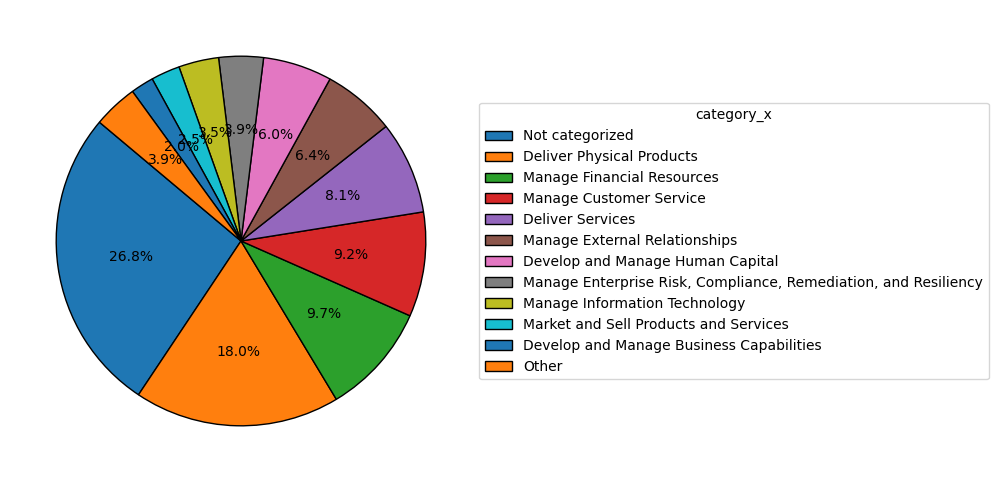

In [60]:
plot_pie_chart(test_df_with_categories, 'category_x')

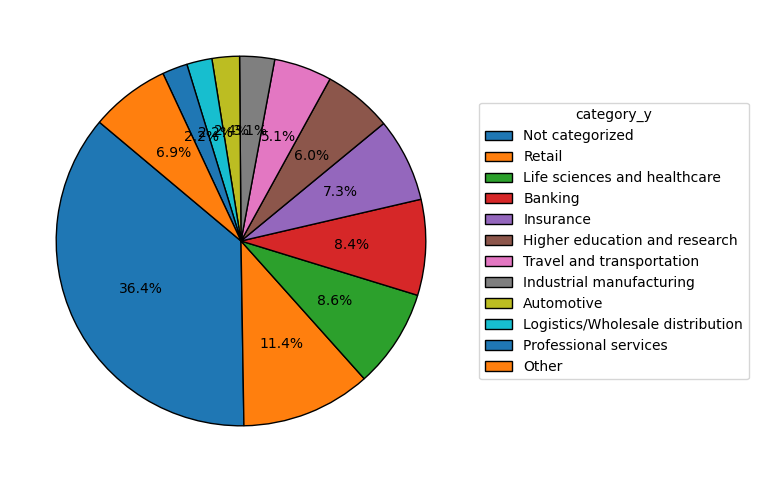

In [61]:
plot_pie_chart(test_df_with_categories, 'category_y')

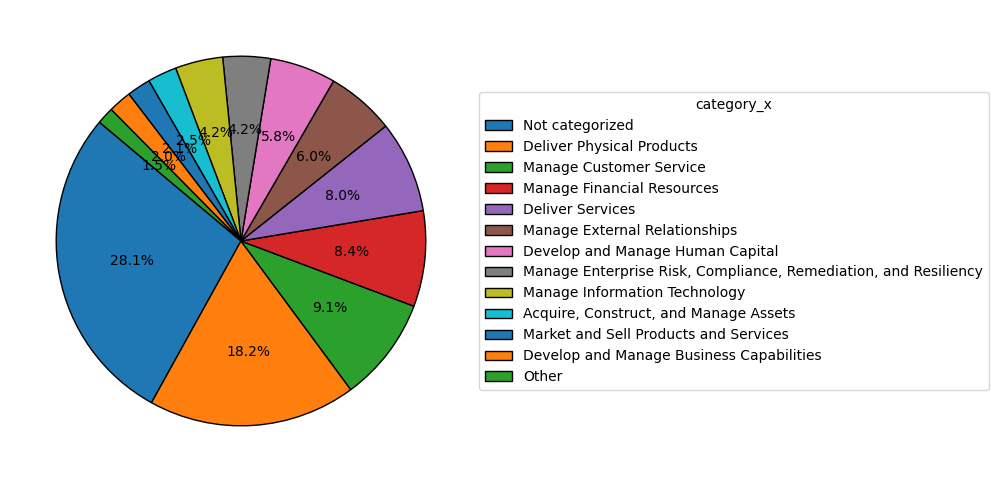

In [64]:
plot_pie_chart(train_df_with_categories, 'category_x')

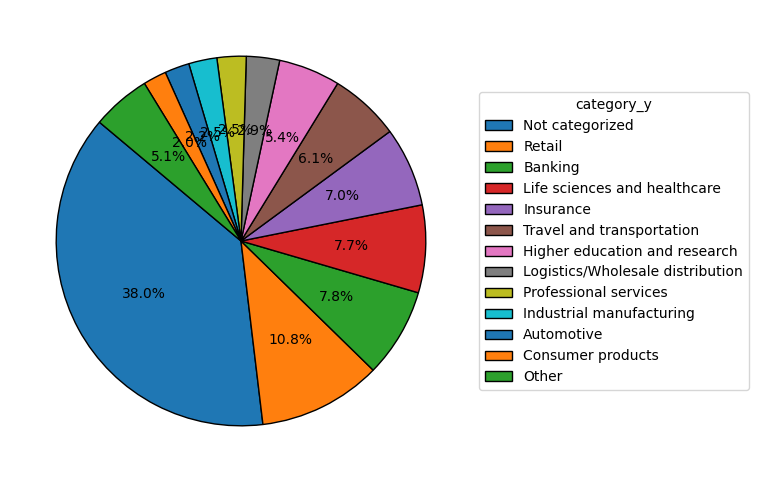

In [65]:
plot_pie_chart(train_df_with_categories, 'category_y')